In [1]:
# Load Libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score

In [2]:
# Importing datasets
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [3]:
print("test",test.shape)
print("train",train.shape)

test (105312, 10)
train (245725, 11)


In [4]:
# Input datasets heads
print('test',test.head())
print('train',train.head())

test          ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No  
train          ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female

In [5]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [7]:
# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer(strategy='constant',fill_value= 'No')
# train = my_imputer.fit_transform(train)
# test = my_imputer.fit_transform(test)
#train['Credit_Product'] = train['Credit_Product'].replace(np.nan, 'No')
#test['Credit_Product'] = test['Credit_Product'].replace(np.nan, 'No')

In [8]:
# Visualization of Lead
val=list(train['Is_Lead'].value_counts())
for i in range(len(val)):
    print(train['Is_Lead'].value_counts().index[i],round(val[i]/sum(val)*100),'%')

0 76 %
1 24 %


In [9]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [11]:
# Droping unique values
train_final=train.copy()
train_final.drop(['ID'],axis=1,inplace=True)

In [12]:
# Finding categorical columns
cat_col=list(set(train_final.columns)-set(train_final._get_numeric_data().columns))

In [13]:
cat_col

['Occupation',
 'Region_Code',
 'Channel_Code',
 'Is_Active',
 'Credit_Product',
 'Gender']

In [14]:
# Label encoding
def label_encoding_conversion(df,cat_col):
    le=preprocessing.LabelEncoder()
    for i in range(len(cat_col)):
        df[cat_col[i]]=le.fit_transform(df[cat_col[i]]) # le.fit_transform(df[cat].astype(str))
    return df

In [15]:
train_final=label_encoding_conversion(train_final,cat_col)

In [16]:
# EDA
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

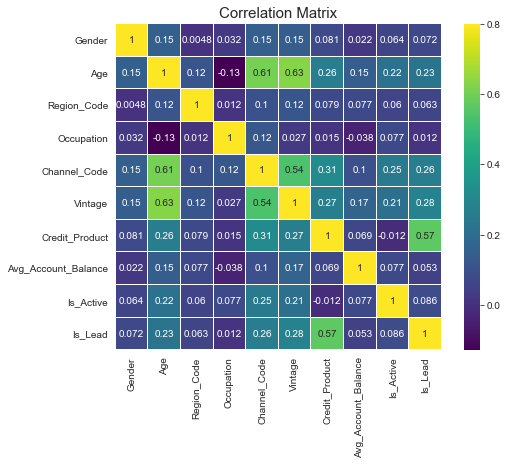

In [17]:
#plotting the correlation matrix

plt.figure(figsize = (8,6))
sns.heatmap(train_final.corr(), vmax = 0.8, linewidths= 0.01, square= True, 
           annot= True, cmap= 'viridis', linecolor= 'white')

plt.title('Correlation Matrix', fontsize = 15)
plt.show()

In [18]:
# Target data set
target=train_final[['Is_Lead']]
train_final.drop(['Is_Lead'],axis=1,inplace=True)
train_final.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0


In [19]:
# Test Data Preprocessing
# TEST data preparation

In [20]:
# Removing unique columns
test_final=test.copy()
test_final.drop(['ID'],axis=1,inplace=True)

In [21]:
test_final=label_encoding_conversion(test_final,cat_col)

In [22]:
# LogisticRegression
lr=LogisticRegression()
lr.fit(train_final,target)
lr_pred=lr.predict(test_final)
accuracy_score(pd.DataFrame(lr.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7627917387323228

In [23]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_final,target)
rf_pred=rf.predict(test_final)
accuracy_score(pd.DataFrame(rf.predict(train_final)),target)

<ipython-input-23-b001d032726e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_final,target)


0.9999430257401567

In [24]:
# GaussianNB
nb=GaussianNB()
nb.fit(train_final,target)
nb.predict(test_final)
accuracy_score(pd.DataFrame(nb.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7564065520398819

In [25]:
# DecisionTreeClassifier
dt=tree.DecisionTreeClassifier()
dt.fit(train_final,target)
dt.predict(test_final)
accuracy_score(pd.DataFrame(dt.predict(train_final)),target)

0.9999918608200223

In [26]:
# AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(train_final,target)
ada.predict(test_final)
accuracy_score(pd.DataFrame(ada.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8555905992471259

In [27]:
# KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_final,target)
knn.predict(test_final)
accuracy_score(pd.DataFrame(knn.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8026330247227592

In [29]:
# GradientBoostingClassifier
gb=ensemble.GradientBoostingClassifier()
gb.fit(train_final,target)
gb.predict(test_final)
accuracy_score(pd.DataFrame(gb.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8602624885542781

In [30]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier().fit(train_final,target)
y_pred = xgb_model.predict(test_final)
accuracy_score(pd.DataFrame(xgb_model.predict(train_final)),target)

C:\Users\ekajgho\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8668715026961034

In [31]:
lgbm =LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=30,
    max_depth=7,
    learning_rate=0.1,
    n_estimators=150,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
    silent=True,
    importance_type='split'
)

In [33]:
lgbm.fit(train_final,target)
lgbm.predict(test_final)
accuracy_score(pd.DataFrame(lgbm.predict(train_final)),target)


C:\Users\ekajgho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8631559670363211

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_final, target, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
rf.fit(X_train, y_train)
print('Training score =', rf.score(X_train, y_train))
print('Test score =', rf.score(X_test, y_test))

In [ ]:
dt.fit(X_train, y_train)
print('Training score =', dt.score(X_train, y_train))
print('Test score =', dt.score(X_test, y_test))

In [ ]:
ada.fit(X_train, y_train)
print('Training score =', ada.score(X_train, y_train))
print('Test score =', ada.score(X_test, y_test))

In [ ]:
gb.fit(X_train, y_train)
print('Training score =', gb.score(X_train, y_train))
print('Test score =', gb.score(X_test, y_test))

In [ ]:
nb.fit(X_train, y_train)
print('Training score =', nb.score(X_train, y_train))
print('Test score =', nb.score(X_test, y_test))

In [ ]:
lr.fit(X_train, y_train)
print('Training score =', lr.score(X_train, y_train))
print('Test score =', lr.score(X_test, y_test))

In [ ]:
knn.fit(X_train, y_train)
print('Training score =', knn.score(X_train, y_train))
print('Test score =', knn.score(X_test, y_test))

In [ ]:
xgb_model.fit(X_train, y_train)
print('Training score =', xgb_model.score(X_train, y_train))
print('Test score =', xgb_model.score(X_test, y_test))

In [ ]:
### From the above results it is observed that XGB Classifier is the best performing model. 

In [ ]:
predictions = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = xgb_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Predict and submission file
predict_test=xgb_model.predict(test_final)
pred_df=pd.DataFrame(predict_test,columns=['Is_Lead'])
submission=pd.concat([test[['ID']],pred_df],axis=1)
submission.to_csv('sub.csv',index=False,header=True)